# Vibrations Lab Notebook

## Importing modules

In [2]:
# For file finding:
import os
import glob

# The usual:
import numpy as np
import pandas as pd
import math
import random as rand
from scipy import integrate

# Plotting:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pylab import rcParams
import seaborn as sb

# ML:
from sklearn.linear_model import LinearRegression

%matplotlib inline
rcParams['figure.figsize'] = 10, 10
sb.set_style('whitegrid')

## Importing Data

In [3]:
# This goes and finds files in the specified path of a certain extension.
# It then makes pandas dataframes out of them

# Can use suppres flag to hush output

def file_finder(path,extension,suppress=False):

    if not suppress:
        print('Looking for files in:'+path+'\n')

    os.chdir(path) # Change dir to path
    files = {}
    for file in glob.glob(extension):
        if not suppress:
            print('Found',file+'... adding')
        files["file{0}".format('_'+file)] = path+'\\'+file
        
    if len(files) == 0:
        print('No files found :(')
        return # Exit function if no files found
    
    print ('\n')
    
    # Creates data frames from filenames:
    dataframes = {}
    for i,file in enumerate(files):
        try:
            dataframes["df_{}".format(i)] = pd.read_csv(files[file])
        except:
            print('There was an error reading',file,'. Please check and try again')
            return
        if not suppress:
            print( 'Writing ' + file + ' to ' + "df_{}".format(i))
            
    return dataframes

dataframes = file_finder(r'..\data',"*.csv")

Looking for files in:..\data

Found 1_350spring_50psi_compression0_rebound0_speed2.csv... adding
Found 2_nospring_50psi_compression0_rebound0_speed2.csv... adding
Found 3_nospring_50psi_compression0_rebound4T_speed2.csv... adding
Found 4_nospring_50psi_compression3p66T_rebound0_speed2.csv... adding
Found 5_nospring_50psi_compression0_rebound0_speed4.csv... adding


Writing file_1_350spring_50psi_compression0_rebound0_speed2.csv to df_0
Writing file_2_nospring_50psi_compression0_rebound0_speed2.csv to df_1
Writing file_3_nospring_50psi_compression0_rebound4T_speed2.csv to df_2
Writing file_4_nospring_50psi_compression3p66T_rebound0_speed2.csv to df_3
Writing file_5_nospring_50psi_compression0_rebound0_speed4.csv to df_4


In [4]:
dataframes['df_0'].head()

,Force,Displacement,Velocity
0,1123.10,0.001931,-1.92595
1,1115.84,0.001785,-1.93083
2,1108.59,0.001687,-1.92595
3,1098.92,0.001541,-1.92595
4,1089.25,0.001443,-1.93083


Text(0, 0.5, 'Force / N')

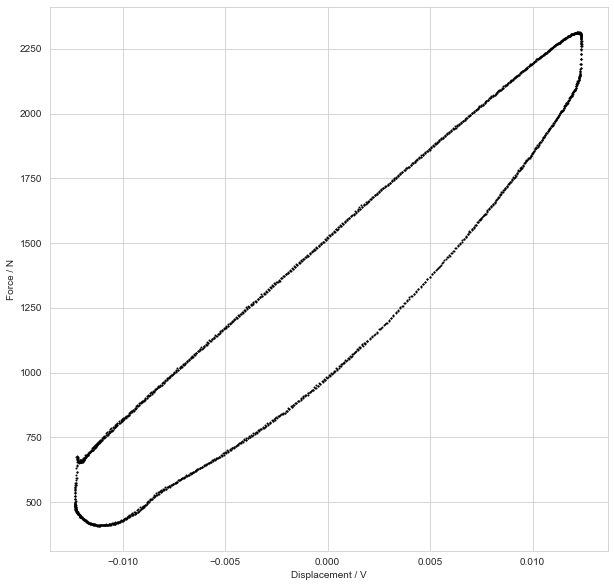

In [5]:
# Test graph
xaxis='Displacement';xunit='V'
yaxis='Force';yunit='N'
df = dataframes['df_0']

plt.scatter(x=df[xaxis],
            y=df[yaxis],
            s=1,
            color='black'
           )

plt.xlabel(xaxis +' / '+ xunit)
plt.ylabel(yaxis +' / '+ yunit)


Now we have the data imported, it needs to be calibrated

## Calibration
- Add time column
- Differentiate the diplacement signal numerically based on time separation
    - Sample Frequency: **1000.0** Samples per second
    - Sample Seconds: **2.00**
- Plot derivative of the displacement against the voltage values
- Calculate a line of best fit for the calibrating funciton.
- Check units
- Multiply calibration coeficient by Voltage

In [6]:
def calibrate(df,t=2,sf=2000,diff_column='Displacement',calib_column='Velocity',quiet=True,xlab='Calibrating_Target',ylab='Differential',title='Calibration Graph'):
    yaxis = pd.DataFrame(np.gradient(df[diff_column], t/sf))
    xaxis = calib_column
    if quiet:
        calib_coef= linreg(df[xaxis],yaxis[0])[0]
        return calib_coef
    else:
        linreg(df[xaxis],yaxis[0],graph=True,title=title,eqn=True,xlab=xlab,ylab=ylab,save=True,save_name='Calib_graph.jpg')
        return

calibrate(dataframes['df_1'],quiet=False,xlab='Voltage / V',ylab='Displacement / m/s',title='Calibration Graph using Config 2')
calibration_coef=calibrate(dataframes['df_1'])
print ('Calibration coeficient is', calibration_coef , 'm/sV')

NameError: name 'linreg' is not defined

In [7]:
def calibrated_column(df,calibration_coef,targ_col='Velocity'):
    return [i*calibration_coef for i in df[targ_col]]

dataframes['df_1']['Calibrated Velocity'] = calibrated_column(dataframes['df_0'],calibration_coef)
dataframes['df_1'].head()

NameError: name 'calibration_coef' is not defined

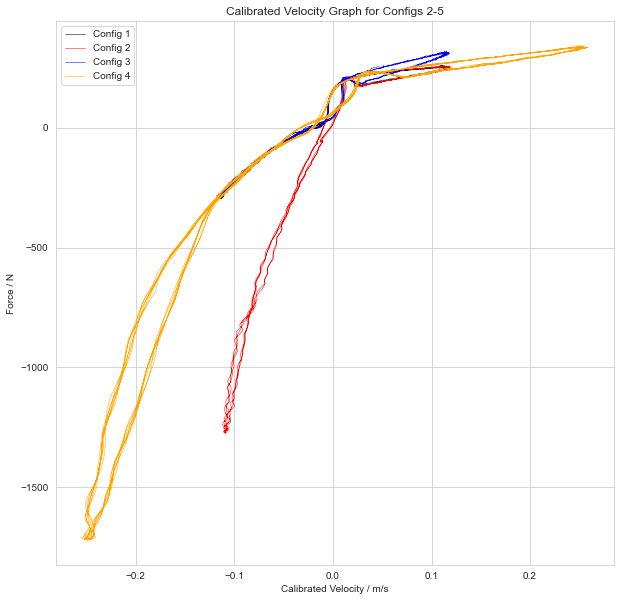

In [288]:
#for value in dataframes:
    #dataframes[value]['Calibrated Velocity'] = calibrated_column(dataframes['df_0'],calibration_coef)
    
dataframes['df_1']['Calibrated Velocity'] = calibrated_column(dataframes['df_1'],calibration_coef)
dataframes['df_2']['Calibrated Velocity'] = calibrated_column(dataframes['df_2'],calibration_coef)    
dataframes['df_3']['Calibrated Velocity'] = calibrated_column(dataframes['df_3'],calibration_coef)    
dataframes['df_4']['Calibrated Velocity'] = calibrated_column(dataframes['df_4'],calibration_coef)    
    
plt.plot(dataframes['df_1']['Calibrated Velocity'],dataframes['df_1']['Force'],color='black',linewidth=0.5)
plt.plot(dataframes['df_2']['Calibrated Velocity'],dataframes['df_2']['Force'],color='red',linewidth=0.5)
plt.plot(dataframes['df_3']['Calibrated Velocity'],dataframes['df_3']['Force'],color='blue',linewidth=0.5)
plt.plot(dataframes['df_4']['Calibrated Velocity'],dataframes['df_4']['Force'],color='orange',linewidth=0.5)
plt.xlabel('Calibrated Velocity / m/s')
plt.title('Calibrated Velocity Graph for Configs 2-5')
plt.ylabel('Force / N')
plt.legend(['Config 1','Config 2','Config 3','Config 4'])
plt.savefig('./Calibrated Velocity Graph for configs 2-5.jpg')
plt.show()

In [ ]:
def damp_coef_lin(df):
    

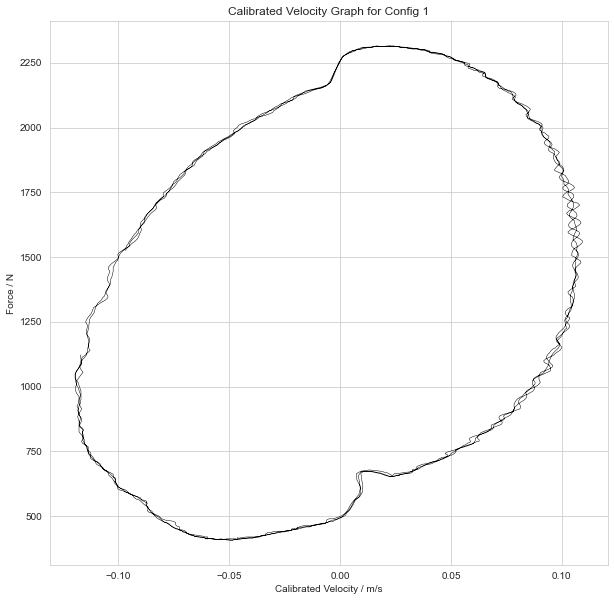

In [289]:
dataframes['df_0']['Calibrated Velocity'] = calibrated_column(dataframes['df_0'],calibration_coef)
    
plt.plot(dataframes['df_0']['Calibrated Velocity'],dataframes['df_0']['Force'],color='black',linewidth=0.5)

plt.xlabel('Calibrated Velocity / m/s')
plt.title('Calibrated Velocity Graph for Config 1')
plt.ylabel('Force / N')
plt.savefig('./Calibrated Velocity Graph for config 1.jpg')
plt.show()

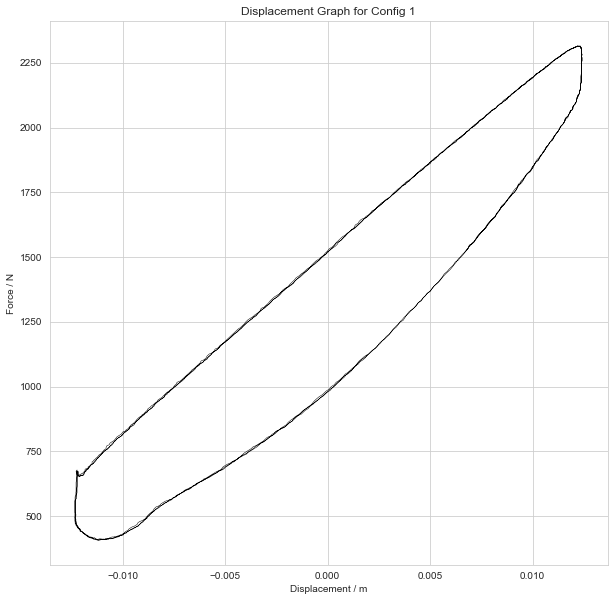

In [290]:
plt.plot(dataframes['df_0']['Displacement'],dataframes['df_0']['Force'],color='black',linewidth=0.5)

plt.xlabel('Displacement / m')
plt.title('Displacement Graph for Config 1')
plt.ylabel('Force / N')
plt.savefig('./Displacement Graph for config 1.jpg')
plt.show()

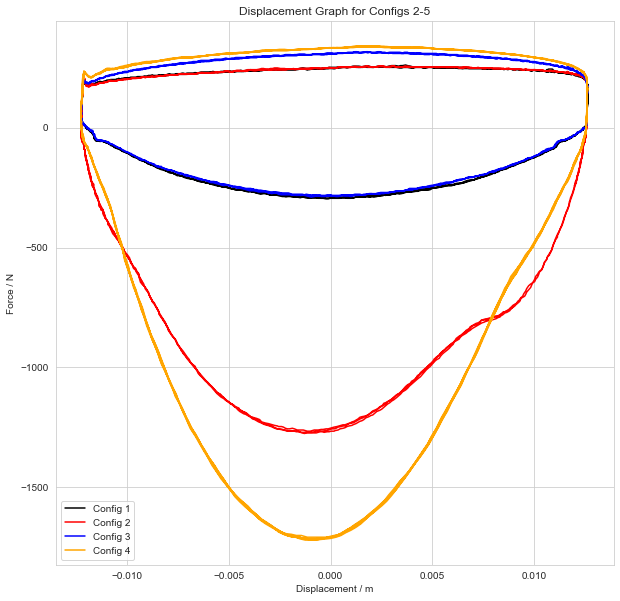

In [291]:
plt.plot(dataframes['df_1']['Displacement'],dataframes['df_1']['Force'],color='black')
plt.plot(dataframes['df_2']['Displacement'],dataframes['df_2']['Force'],color='red')
plt.plot(dataframes['df_3']['Displacement'],dataframes['df_3']['Force'],color='blue')
plt.plot(dataframes['df_4']['Displacement'],dataframes['df_4']['Force'],color='orange')
plt.xlabel('Displacement / m')
plt.title('Displacement Graph for Configs 2-5')
plt.ylabel('Force / N')
plt.legend(['Config 1','Config 2','Config 3','Config 4'])
plt.savefig('./Displacement Graph for configs 25.jpg')
plt.show()

Text(0, 0.5, 'Force / N')

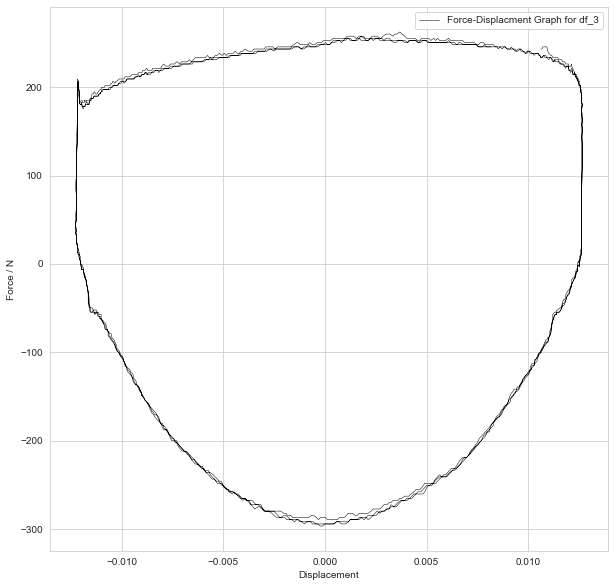

In [292]:
plt.plot(dataframes['df_1']['Displacement'],dataframes['df_1']['Force'],color='black',linewidth=.5)
plt.xlabel('Displacement')
plt.legend(['Force-Displacment Graph for df_3'])
plt.ylabel('Force / N')

## Calculation of Coeficients
### Spring coeficient
- Can be calculated using compined spring-damper characteristics
    - Can
    
### Damping Coeficient
$C_B$ and $C_R$ can be calculated by intergrating different half-cycles in the F-x plot to get separate values. They can be also calulated using a straigt line fit in the F-v plot. This method is error-prone, but both methods should be implemented.

#### Method 1 / F-x plot (integration)

- For df_1-4 (no spring) , numerical integration over 1 cycle
    - Sort?
    - Negative to positive point of displacement, 
        positive to negative point and all values in between. (and vice versa)

#### Method 2 / F-v straight line fit (error prone)

- No idea yet

In [13]:
def spring_constant(df):
    return linreg(df['Displacement'],df['Force'])[0]

print('spring_constant is',spring_constant(dataframes['df_0']))

def preload(df):
    m=(df['Force'].max()-df['Force'].min())/(df['Displacement'][df['Force'].idxmax()]-(df['Displacement'][df['Force'].idxmin()]))
    preload=df['Force'].max()-m*df['Displacement'][df['Force'].idxmax()]
    return preload

def frequency(df,col='Displacement',t=2,sf=2000):
    ## Returns frequency in radians per second
    
    #First find points where displacement goes from negative to possitive:
    minmax=[]
    df.sort_index(axis=1)
    for i in range(1,len(df)-1):
            if df[col][i]<0 and df[col][i-1]>0 or df[col][i]>0 and df[col][i-1]<0 :
                minmax.append(i)
    
    # Find average distance between samples:
    avr_sample_int=sum([minmax[i+1]-minmax[i] for i in range(0,len(minmax)-1)])/(len(minmax)-1)
    avr_t_int=(2/2000) * (avr_sample_int*2)
    
    return  (1/avr_t_int)*( 2 * np.pi)
    
def damping_coefs(df,velocity='Calibrated Velocity',displacement='Displacement',force='Force'):
    ## Returns and array [C_b , C_r] for given dataframe
    
    df.sort_values(by=[displacement],inplace=True)
    
    a=df['Displacement'].max()
    
    # Separate possitive values and negative
    df_bump = df[(df[[force]] > 0).all(1)]
    df_rebound = df[(df[[force]] < 0).all(1)]
    
    area_bump = abs(integrate.trapz(df_bump['Force'],x=df_bump['Displacement']))
    
    area_rebound = abs(integrate.trapz(df_rebound['Force'],x=df_rebound['Displacement']))
    
    freq = frequency(df)
    
    C_b = (2 * area_bump)/(np.pi * freq * a * a)
    C_r = (2 * area_rebound)/(np.pi * freq * a * a)
    
    return [C_b,C_r]
    
print('Config 2:',damping_coefs(dataframes['df_1']))
print('Config 3:',damping_coefs(dataframes['df_2']))
print('Config 4:',damping_coefs(dataframes['df_3']))
print('Config 5:',damping_coefs(dataframes['df_4']))

spring_constant is 69879.76977420479
Config 2: [2480.6020941423317, 2129.9645304091496]
Config 3: [2532.603228577674, 9576.096773432811]
Config 4: [2983.7249295252814, 2066.3603654557737]
Config 5: [1456.632382026925, 5252.5515686261615]


In [10]:
'''
     ---------------------------------------------------------------------
    | Function can either generate a selected graph of data with a Linear |
    | Regression line plotted on it and the equation of the line if graph |
    | is True                                                             |
    |                                                                     |
    |                                or                                   |
    |                                                                     |
    |      By default it will return an array with the following:         |
    |                                                                     |
    |        [x1 coef,x2 coef.,std err of x1, std error of x2]            |
     ---------------------------------------------------------------------

'''
def linreg(x_csv,y_csv,graph=False,title='',eqn=False,xlab='',ylab='',save=False,save_name='figure.jpeg'):
    
    x = np.array(x_csv) # Parses in data
    y = np.array(y_csv)
    
    if graph:
        
        linreg = LinearRegression()
        x_rs = x.reshape(-1,1)        # Transposes array
        linreg.fit(x_rs,y)            # Makes linear regression line
        y_pred = linreg.predict(x_rs) # Generates predicted y values for each x value

        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(x_rs,y,3,color='black')                               # Plots clock data on a scatter. 6 Series total
        ax.plot(x_rs, y_pred, color='black', linewidth=0.5)  # Plots x values against predicted y values

        #scale_y = 1e-3                                                             # Set Scale
        #ticks_y = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/scale_y))   
        #ax.yaxis.set_major_formatter(ticks_y)                                      # Applies scale to y axis

        plt.xlabel(xlab)   # Naming x axes
        plt.ylabel(ylab)   # Naming y axes
        plt.title(title)
        
        if eqn:
            print ("Equation for regression line of",
                   title,": >>> y =",linreg.coef_[0],"x +",
                   linreg.intercept_, "<<<")
            
        if save:
            plt.savefig(save_name)
        return
    
    if not graph:
        
        # Polyfit gives linear regression coefs.
        # cov=True produces covarience from which std.error can be generated
        # by squarooting the diagonals of the matrix.

        coef, covar = np.polyfit(x,y,1,cov=True)

        std_err_m = math.sqrt(covar[0,0])
        std_err_intcpt = math.sqrt(covar[1,1])
        
        return [coef[0],coef[1],std_err_m,std_err_intcpt]

        # print ("Std Error of",title,">>> gradient  >>>",std_err_m,"<<<")
        # print ("Std Error of",title,">>> intercept >>>",std_err_intcpt,"<<<")
